In [ ]:
# Analyze the Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/Zoo.csv')
data

animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1         1         1         0     0     4     0         0   
1          1         1         1         0     0     4     1         0   
2          1         1         0         0     1     0     1         0   
3          1         1         1         0     0     4     0         0   
4          1         1         1         0     0     4     1         0   
..       ...       ...       ...       ...   ...   ...   ...       ...   
96         1         1         1         0     0     2     1         0   
97         0         0         1         1     0     6     0         0   
98         1         1         1         0     0     4     1         0   
99         0         0         1         0     0     0     0         0   
100        0         1         1         0     0     2     1         0   

     catsize  type  
0          1     1  
1          1     1  
2          0     4  
3          1     1  
4          1     1  
..       ...   ...  
96         1     1  
97         0     6  
98         1     1  
99         0     7  
100        0     2  

[101 rows x 18 columns]

In [ ]:
# Summary statistics
print(data.describe())

             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.4915

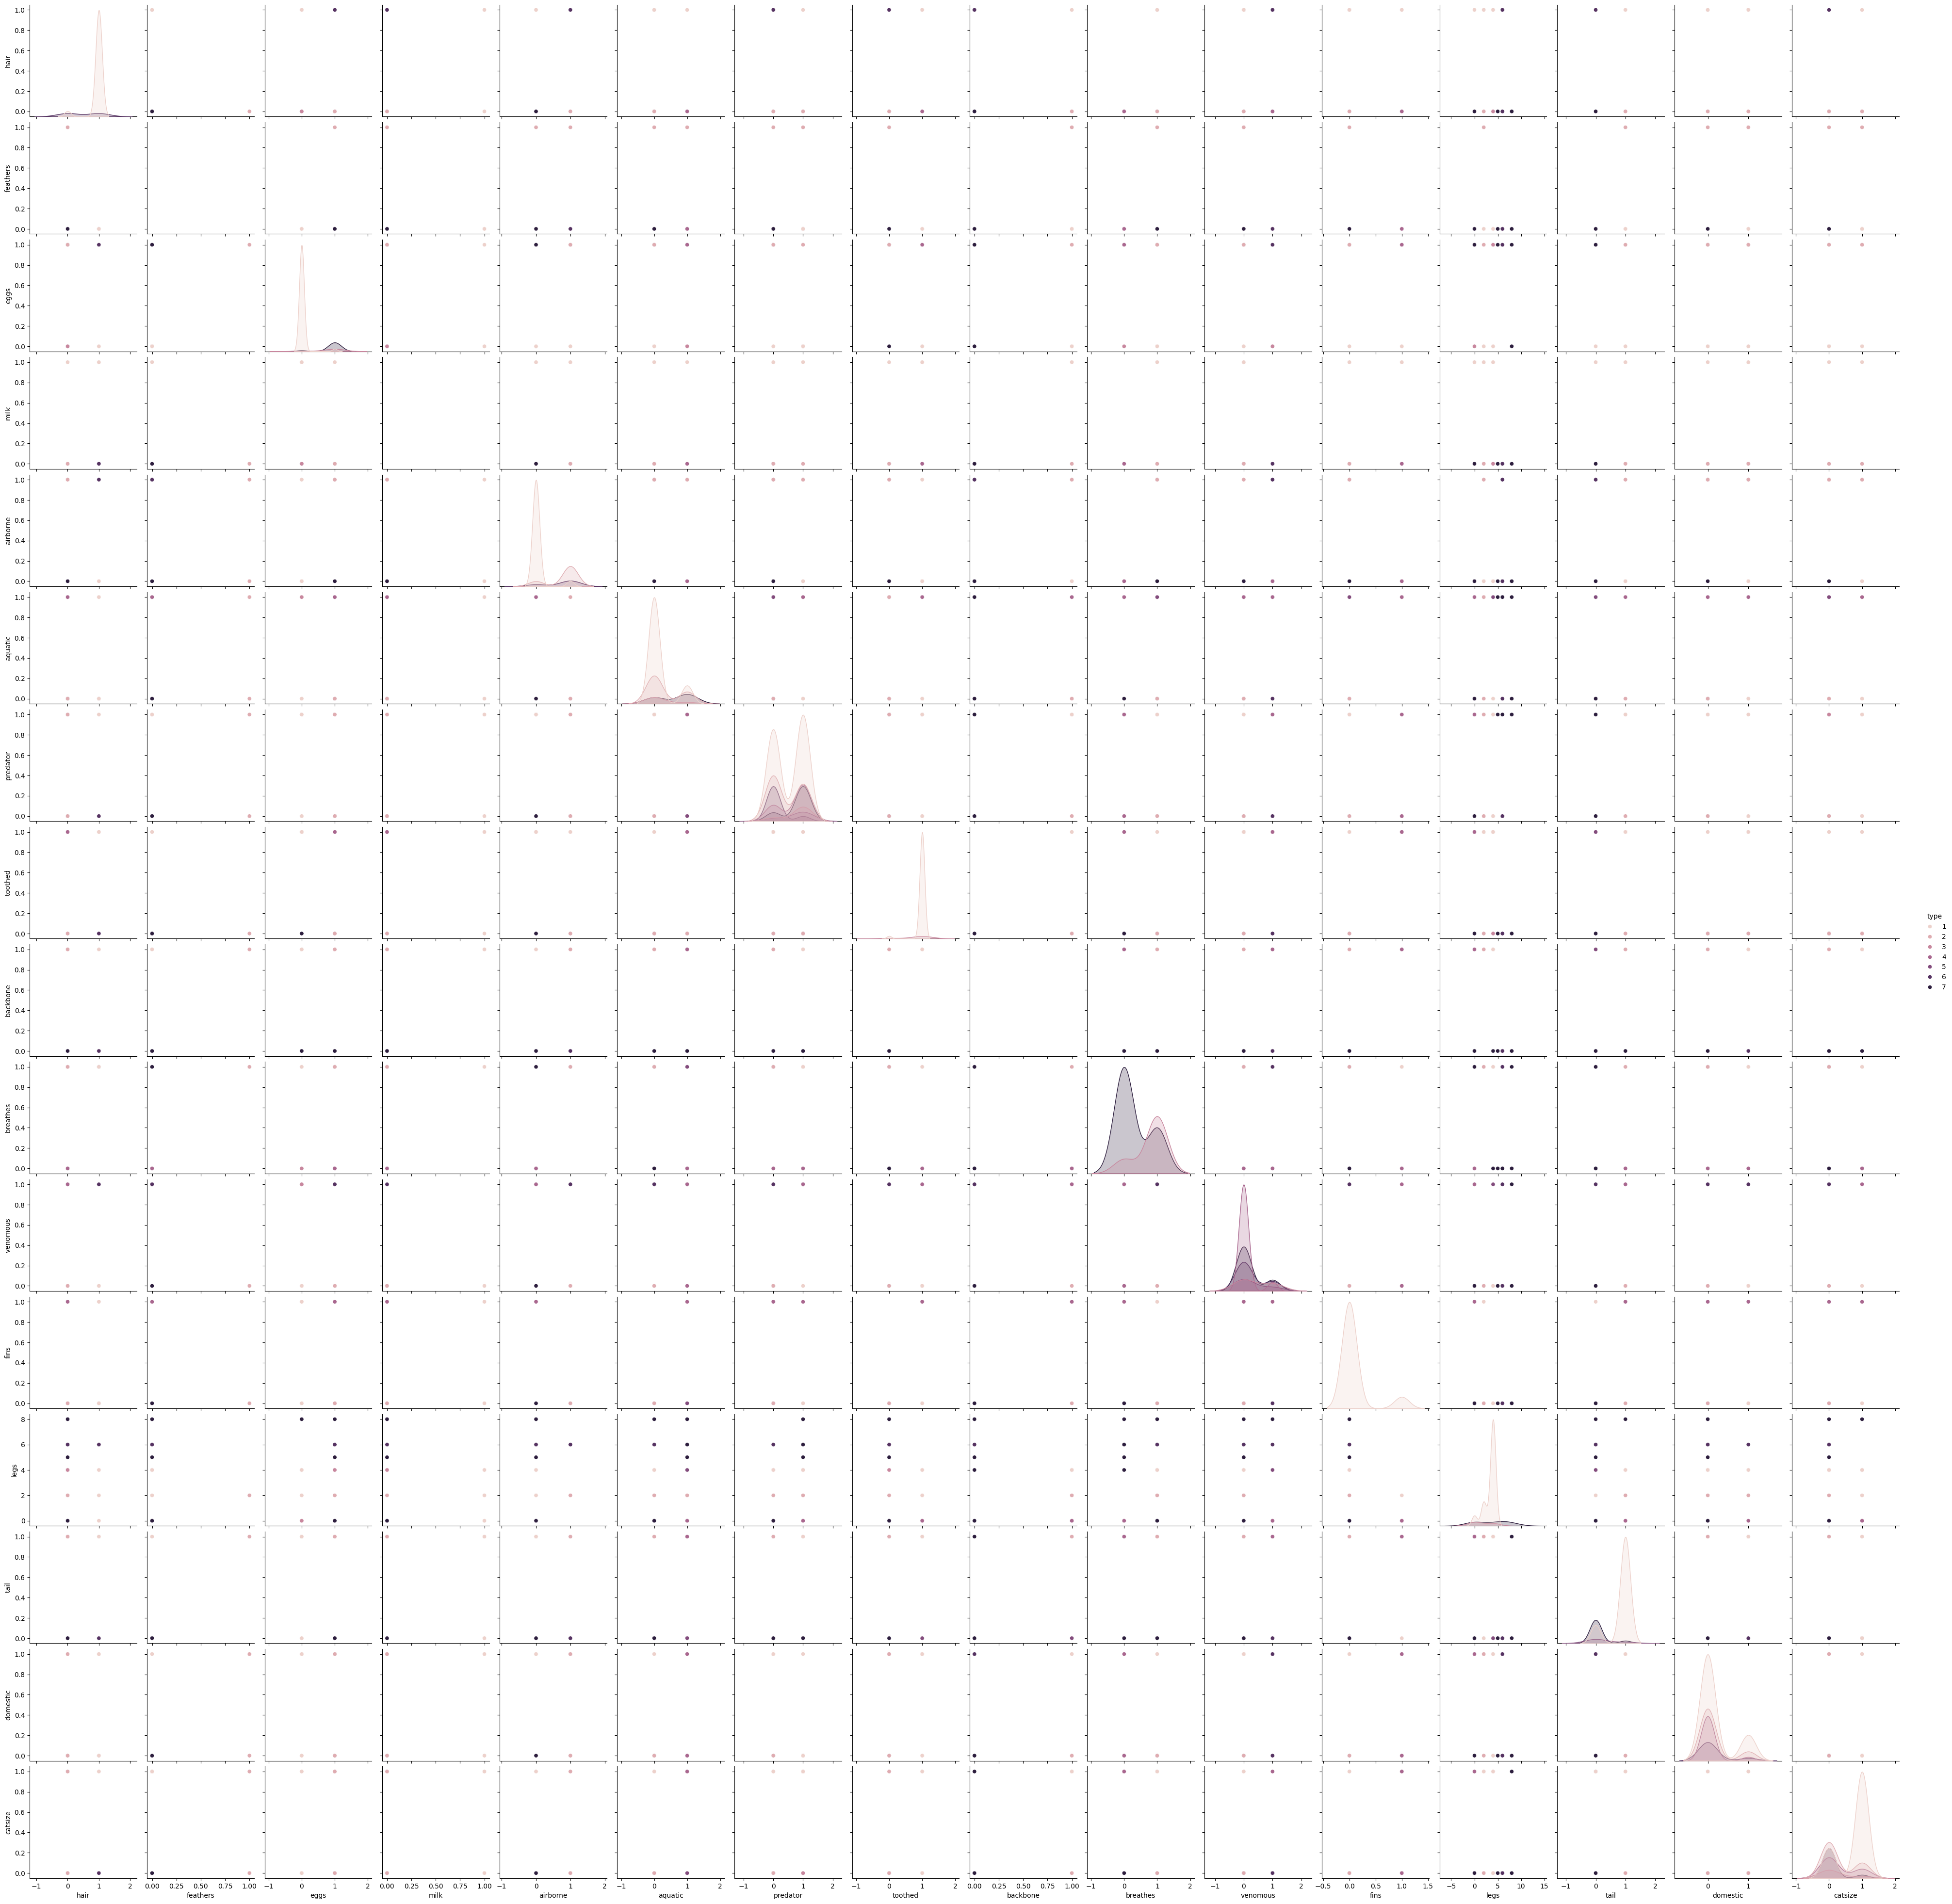

In [ ]:
# Visualize pairwise relationships in the dataset
sns.pairplot(data, hue='type')
plt.show()

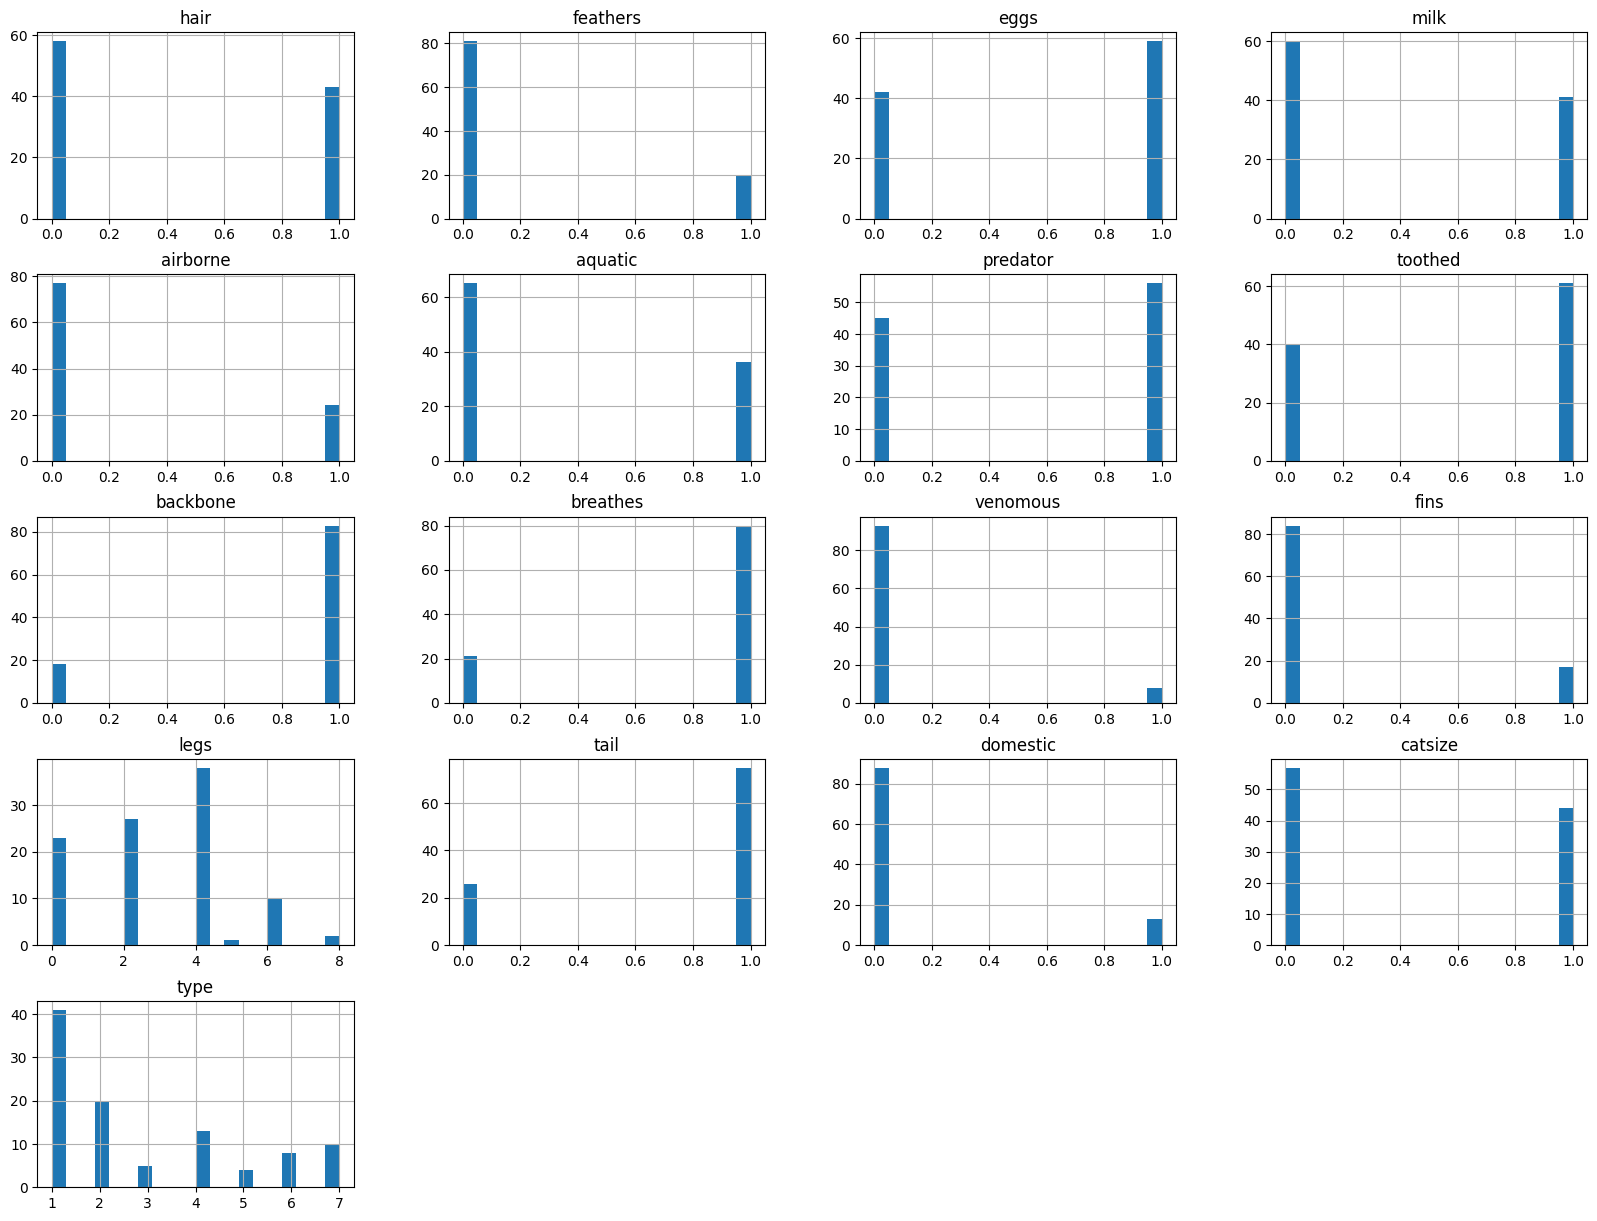

In [ ]:
# Visualize the distribution of each feature
data.hist(bins=20, figsize=(20, 15))
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
print(data.isnull().sum())

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [ ]:
features = data.drop(['type', 'animal name'], axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
target = data['type']
features_scaled

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [ ]:
data_scaled = pd.DataFrame(features_scaled, columns=features.columns)
data_scaled['type'] = data['type']
print(data_scaled.head())

       hair  feathers      eggs      milk  airborne   aquatic  predator  \
0  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208  0.896421   
1  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208 -1.115547   
2 -0.861034 -0.496904  0.843721 -0.826640 -0.558291  1.343710  0.896421   
3  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208  0.896421   
4  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208  0.896421   

    toothed  backbone  breathes  venomous      fins      legs      tail  \
0  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540 -1.698416   
1  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540  0.588784   
2  0.809776   0.46569 -1.951800 -0.293294  2.222876 -1.404435  0.588784   
3  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540 -1.698416   
4  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540  0.588784   

   domestic   catsize  type  
0 -0.384353  1.138180     1  
1 -0.384353  1.138180     1  
2 -0.384

In [ ]:
# Split the Dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['type'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(array([[-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
         -0.38435306, -0.87859537],
        [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
         -0.38435306, -0.87859537],
        [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
         -0.38435306, -0.87859537],
        ...,
        [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
         -0.38435306, -0.87859537],
        [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
         -0.38435306,  1.13818037],
        [ 1.16139451, -0.49690399,  0.84372057, ..., -1.69841555,
         -0.38435306, -0.87859537]]),
 array([[ 1.16139451, -0.49690399, -1.18522652,  1.20971676, -0.55829053,
         -0.74420841, -1.1155467 ,  0.80977633,  0.46569032,  0.51234754,
         -0.29329423, -0.44986771, -0.41594766,  0.58878406, -0.38435306,
         -0.87859537],
        [ 1.16139451, -0.49690399, -1.18522652,  1.20971676, -0.55829053,
         -0.74420841, -1.1155467 ,  0.80977633,  0.465

In [ ]:
print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

Training set size: 80
Testing set size: 21


In [ ]:
# Implement KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn

KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4])

In [ ]:
# Evaluate the Classifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.9523809523809523
Precision: 0.9206349206349207
Recall: 0.9523809523809523
F1-score: 0.9333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Visualize Decision Boundaries

import numpy as np
X_train_2D = X_train[:, :2]
X_test_2D = X_test[:, :2]
knn_2D = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_2D.fit(X_train_2D, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
# Define the mesh grid
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
xx, yy

(array([[-1.86103386, -1.76103386, -1.66103386, ...,  1.93896614,
          2.03896614,  2.13896614],
        [-1.86103386, -1.76103386, -1.66103386, ...,  1.93896614,
          2.03896614,  2.13896614],
        [-1.86103386, -1.76103386, -1.66103386, ...,  1.93896614,
          2.03896614,  2.13896614],
        ...,
        [-1.86103386, -1.76103386, -1.66103386, ...,  1.93896614,
          2.03896614,  2.13896614],
        [-1.86103386, -1.76103386, -1.66103386, ...,  1.93896614,
          2.03896614,  2.13896614],
        [-1.86103386, -1.76103386, -1.66103386, ...,  1.93896614,
          2.03896614,  2.13896614]]),
 array([[-1.49690399, -1.49690399, -1.49690399, ..., -1.49690399,
         -1.49690399, -1.49690399],
        [-1.39690399, -1.39690399, -1.39690399, ..., -1.39690399,
         -1.39690399, -1.39690399],
        [-1.29690399, -1.29690399, -1.29690399, ..., -1.29690399,
         -1.29690399, -1.29690399],
        ...,
        [ 2.80309601,  2.80309601,  2.80309601, ...,  

In [ ]:
# Predict on the mesh grid
Z = knn_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z

array([[6, 6, 6, ..., 1, 1, 1],
       [6, 6, 6, ..., 1, 1, 1],
       [6, 6, 6, ..., 1, 1, 1],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

<ipython-input-27-4cee2b8b7218>:4: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, marker='x', edgecolor='k', s=20)


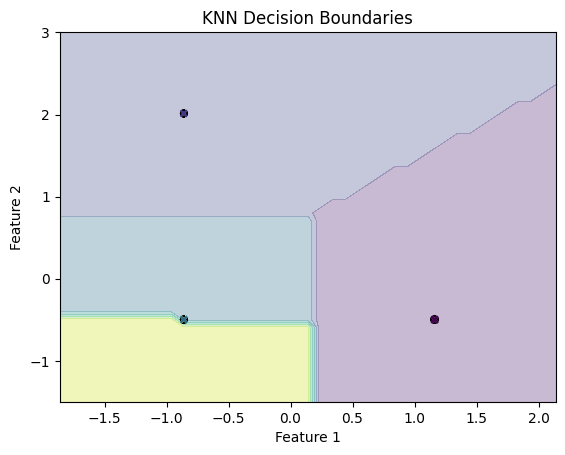

In [ ]:
# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, marker='o', edgecolor='k', s=20)
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, marker='x', edgecolor='k', s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Boundaries')
plt.show()

# **INTERVIEW QUESTIONS**

In [2]:
'''
1. What are the key hyperparameters in KNN?

Answer:

K :- we will read how many nearest neighbors to be taken to do the KNN process.
Distance metric:- distance will be calculated.
Common types are:
Euclidean:- Straight-line distance.
Manhattan:- Sum of absolute differences.

Minkowski:- It generalization the Euclidean and Manhattan.
Weighting function:- It influence the neighbors.
Uniform:- All neighbors equal.
Distance:- Closer neighbors have more influence.

'''

'\n1. What are the key hyperparameters in KNN?\n\nK :- we will read how many nearest neighbors to be taken to do the KNN process.\n\nDistance metric:- distance will be calculated. \nCommon types are:\nEuclidean:- Straight-line distance.\nManhattan:- Sum of absolute differences.\n\nMinkowski:- It generalization the Euclidean and Manhattan.\nWeighting function:- It influence the neighbors.\nUniform:- All neighbors equal.\nDistance:- Closer neighbors have more influence.\n'

In [3]:
'''
2. What distance metrics can be used in KNN?

Answer:

Chebyshev distance: D(x,y) = max(|xi - yi|)
Euclidean distance: D(x,y) = sqrt(sum((xi - yi)^2))
Hamming distance: D(x,y) = sum(xi != yi)
Mahalanobis distance: D(x,y) = sqrt((x - y) * S^-1 * (x - y))
Manhattan distance: D(x,y) = sum(|xi - yi|)
Minkowski distance: D(x,y) = (sum(|xi - yi|^p))^(1/p)
'''

'\n2. What distance metrics can be used in KNN?\n\nAnswer:\n\nChebyshev distance: D(x,y) = max(|xi - yi|)\nEuclidean distance: D(x,y) = sqrt(sum((xi - yi)^2))\nHamming distance: D(x,y) = sum(xi != yi)\nMahalanobis distance: D(x,y) = sqrt((x - y) * S^-1 * (x - y))\nManhattan distance: D(x,y) = sum(|xi - yi|)\nMinkowski distance: D(x,y) = (sum(|xi - yi|^p))^(1/p)\n'